
# Estimation Uncertainty




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#GlobalFinMonthly
url="https://www.dropbox.com/s/3k35mt3t57ygff2/GlobalFinMonthly.csv?dl=1"
Data = pd.read_csv(url,na_values=-99)
# tell python Date is date:
Data['Date']=pd.to_datetime(Data['Date'])
# set an an index
Data=Data.set_index(['Date'])
Data=Data.rename(columns={Data.columns[1]: "MKTUS",Data.columns[2]: "BondUS",
                          Data.columns[3]: "EM",Data.columns[4]: "MKTxUS",Data.columns[5]: "BondxUS" })
Re=(Data.drop('RF',axis=1)).subtract(Data['RF'],axis='index')
Re.tail()

,MKTUS,BondUS,EM,MKTxUS,BondxUS
Date,,,,,
2016-08-31,0.0050,-0.008617,0.024986,0.000638,-0.009752
2016-09-30,0.0025,-0.016617,0.012953,0.012536,0.009779
2016-10-31,-0.0202,-0.049660,0.002274,-0.020583,-0.043676
2016-11-30,0.0486,-0.081736,-0.046071,-0.019898,-0.050459
2016-12-31,0.0182,-0.005596,0.002604,0.034083,-0.023507


# Portfolio optimization in practice

* Investment managers rarely apply the Markowitz framework in it's more pure form as studied in Notebook 4

* Pension funds typically use a 60/40 equity/bond allocation 

* Why not used more often? 

* Requires specifying expected return assumption for entire universe of assets

* Mean-variance optimization weights heavily on assets that have extreme average returns and with attractive covariance properties, i.e., high correlation with asset yielding slightly different return

* What problems that might cause?

* The key problem is that we are dealing with a limited sample of data

* We are interested in finding the ex-ante tangency portfolio
* But MV analysis identifies the ex-post tangency portfolio, i.e. a portfolio that did well in the sample, but it can be a statistical fluke

> How to evaluate the amount of uncertainty and it’s impact on our results?

* Another practical issue that practioners face is that MV analysis (in it's more pure form) does not account for several real world frictions that are more or less important depending on the investor:

 * Shorting an asset requires paying a borrowing fee to the owner of the asset. Shorting costs are sometimes prohibitive for small illiquid stocks
 
 * Most investors cannot really borrow at anything close to the risk-free rate--i.e., often they have to pay a substantially higher rate to borrow than to lend. 
 
 > Between two assets, one with high beta with respect to the tangency portfolio and one with low beta, which one does a constrained investor prefer?
 
 





     
# Estimation uncertainty     

* We will start by evaluating the uncertainty regarding our average expected excess return estimates for each asset

* We will then show how the weights change as we pertubate these estimates in a way that is consistent with the amount of uncertainty

* We will then show how sensitive the benefits of international diversification are

* If observations are serially uncorrelated over time, which returns are close to being, then the standard deviation of a sample average is simply

$$std\left(\sum_i^N\frac{x_i}{N}\right)=\frac{std(x_i)}{\sqrt{N}}$$


* This measures how uncertain we are about the sample mean

* For example, there is a 5% probability that the actual mean $E[x_i]\leq\overline{x_i}-1.64{std(\overline{x_i})}$

* So $std(\overline{x_i})$ gives a measure of how close our estimate is to the true expected value

* Lets compare the sample average and the sample average standard deviation for our assets

In [111]:
Re.head()

,MKTUS,BondUS,EM,MKTxUS,BondxUS
Date,,,,,
1963-02-28,-0.0238,-0.004178,0.095922,-0.005073,NaN
1963-03-31,0.0308,0.001042,0.011849,-0.001929,-0.000387
1963-04-30,0.0451,-0.004343,-0.149555,-0.005836,0.005502
1963-05-31,0.0176,-0.004207,-0.014572,-0.002586,0.002289
1963-06-30,-0.0200,-0.000634,-0.057999,-0.013460,0.000839


In [112]:
# First we get the total number of observations and store it as `T`
T=Re.shape[0]
T

647

In [113]:
# Lets contrast the WMVE weights with the SR of each 

# (1) standard deviation of the sample average of excess return for each asset
avg_std=(Re.std()/(T**0.5))

# (2) sample average of excess return for each asset
avg=Re.mean()

# (3) save as ERstd (excess return standard deviation)
ERstd=pd.concat([avg_std,avg],axis=1)
ERstd

,0,1
MKTUS,0.001735,0.005140
BondUS,0.001377,0.002523
EM,0.002344,0.006923
MKTxUS,0.001836,0.004149
BondxUS,0.000793,0.002054


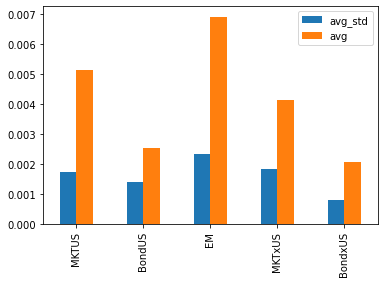

In [114]:
# Lets contrast the WMVE weights with the SR of each 

# (1) standard deviation of the sample average of excess return for each asset
avg_std=(Re.std()/(T**0.5))

# (2) sample average of excess return for each asset
avg=Re.mean()

# (3) save as ERstd (excess return standard deviation)
ERstd=pd.concat([avg_std,avg],axis=1)

# (4) rename columns
ERstd=ERstd.rename(columns={0:'avg_std',1:'avg'})

# (5) plot 
ERstd.plot.bar()
plt.show()

* Note that our data set has  50 years of data, there is still considerable uncertainty, specially for bonds

In [115]:
#number of years
T/12

53.916666666666664

# Statistical tests

In this section we will learn how to do hypothesis testing. Two main questions we try to answer here are: 1) if the average return of an asset is different from zero; 2) if different assets have different average returns.

## T-stat

* T-stat for a given hypothesis $\mu_{j}^0$

$$t_j(\mu_0)=\frac{\bar{R_j}-\mu_{j}^0}{\sigma(\bar{R_j})}$$


## One-sided hypothesis testing
* For example lets assume we have strong theoretical reasons to believe that these assets must not have a negative expected returns. (True for the value-weighted stock market, less true for bonds)

* So lets do a 1-sided test with 5% interval and ask what it is the largest expected return $X_j$ that we can say with 95% confidence that the asset j has expected return higher than $X_j$

$$1.64=\frac{\bar{R_j}-\mu_{j}^0}{\sigma(\bar{R_j})}$$

* If we are evaluating the hypothesis that $\mu_{j}=0$, we say that 

  * if $\frac{\bar{R_j}-0}{\sigma(\bar{R_j})}\geq 1.64$, we can statistically reject that $\mu_{j}=0$ with a 95% confidence (or alternatively: we can statistically reject that $\mu_{j}=0$ with a 5% probabilit value (pvalue) )
  * if $\frac{\bar{R_j}-0}{\sigma(\bar{R_j})}<1.64$, we fail to statistically reject that $\mu_{j}=0$ with a 95% confidence (or alternatively: we fail to statistically reject that $\mu_{j}=0$ with a 5% probability value (pvalue) )
  

* Equivalently we can also construct our confidence intervals for the expected mean

$$\mu_{j}^{-,95\%}=\bar{R_j}-1.64\sigma(\bar{R_j})$$

$$\mu_{j}^{+,95\%}=\bar{R_j}+1.64\sigma(\bar{R_j})$$


* We say that this interval $[\mu_{j}^{-,95\%}, \mu_{j}^{+,95\%}]$ contains the true expected value with 95% probability

In [116]:
print(ERstd)

          avg_std       avg
MKTUS    0.001735  0.005140
BondUS   0.001377  0.002523
EM       0.002344  0.006923
MKTxUS   0.001836  0.004149
BondxUS  0.000793  0.002054


Here is a look at t-stats relative to a zero null-hypothesis (which is what people often do)


> Side comment: Why am using 1.64?

Recall from Notebook 3:

In [117]:
from scipy.stats import norm
ps=norm(0,1)
ps.isf(0.02)

2.053748910631823

In [118]:
# we can look at the t-stats (against zero) for the assets
# the average return divided by the average return estimator standard deviation
ERstd=pd.concat([ERstd, Re.mean()/(Re.std()/(T**0.5))],axis=1)
ERstd=ERstd.rename(columns={0:'t_stat'})
ERstd

,avg_std,avg,t_stat
MKTUS,0.001735,0.005140,2.962459
BondUS,0.001377,0.002523,1.832010
EM,0.002344,0.006923,2.953007
MKTxUS,0.001836,0.004149,2.259454
BondxUS,0.000793,0.002054,2.591087


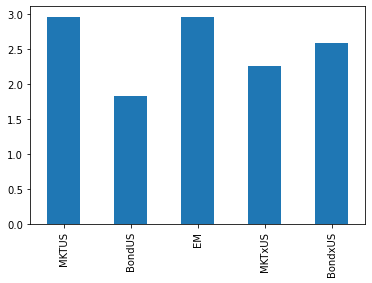

In [119]:
# Plot t-stats for each asset
ERstd.t_stat.plot.bar()
plt.show()

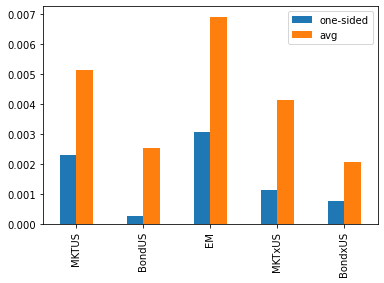

In [120]:
# Plot the left hand side of the confidence interval and the average return 
#   for each asset
ER0=pd.concat([Re.mean()-1.64*(Re.std()/(T**0.5)),Re.mean()],axis=1)
ER0=ER0.rename(columns={0:'one-sided',1:'avg'})
ER0.plot.bar()
plt.show()

## Two-sided intervals

* If we are more agnostic and believe less in the economic theories we have,

* Or the theories are silent

* For example, the theories are silent in long-short portfolios of equities, for example, the portfolio that goes long the US market and sells the international market.

* Then we must do a two-sided interval

> What is the 95% threshold for a two sided test?

In [121]:
ps.isf(0.05/2)

1.9599639845400545

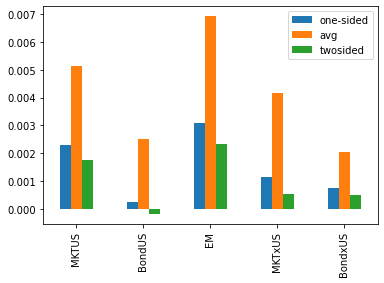

In [122]:
# Plot the lower bar of the two-sided confidence interval

ER0['twosided']=Re.mean()-1.96*(Re.std()/(Re.shape[0]**0.5))
ER0.plot.bar()
plt.show()

## Pvalues


* Instead of using our t-stats to do a test at a particular level of significance, say 95%

* We can use the normal cdf to find p-value, which gives us the highest level of significance our data is consistent with

* Here again, against the zero null hypothesis

In [123]:
# We can also construct p'values
from scipy.stats import norm
# and I am creating this `ps` object which is the standard normal distribution
ps=norm(0,1)

In [124]:
ps.isf(0.95)
ps.ppf(0.95)

1.6448536269514722

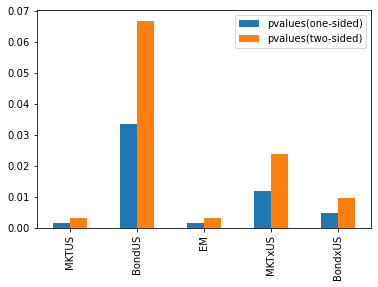

In [125]:
ER0['pvalues(one-sided)']=1-ps.cdf((Re.mean()/(Re.std()/(Re.shape[0]**0.5))).values)
ER0['pvalues(two-sided)']=(1-ps.cdf(np.abs((Re.mean()/(Re.std()/(Re.shape[0]**0.5))).values)))*2
ER0[['pvalues(one-sided)','pvalues(two-sided)']].plot.bar()
plt.show()

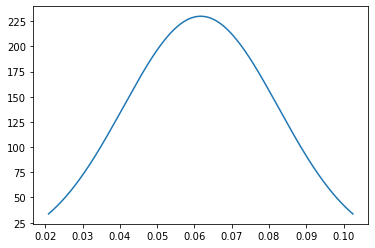

In [126]:
# lets look at a two-sided 95% confidence interval (I am annulaizing for convenience)

# (1) choose the confidence level
interval=0.95
# in the two-sided case, tail probability is half of (1-interval)
tails=(1-interval)/2

# (2) construct a normal distribution using the mean and standard deviation of a chosen asset
asset='MKTUS'
mu=Re[asset].mean()
mu_sigma=Re[asset].std()/Re[asset].count()**0.5
# do also at yearly, but do so with explanation

p=norm(mu,mu_sigma)

# (3) get the value of the left tail and the right tail
lefttail=p.ppf(tails)
righttail=p.ppf(1-tails)
# note that x=pnorm.isf(q) is the inverse of the CDF.
# The inverse CDF at `q` is also referred to as the `q quantile` of a distribution.
# For a continuous distribution `DIST`, the inverse CDF at q is the value x such that CDF[DIST,x]=q. 
# So there is exactly probability q that the realization is higher than x.

# or equivalently
#lefttail=mu+pnorm.isf(tails)*musigma
#righttail=mu+pnorm.isf(1-tails)*musigma

# (4) plot
grid=np.linspace(lefttail,righttail,1000)
# this constructs a grid going spanning the region given by the confidence interval

plt.plot(grid*12, p.pdf(grid))
plt.show()

## Test if all assets have the same average return

* A more relevant test is whether all these assets have the same average return

> Why that is the most relevant hypothesis for us as we do MV optimization?

* For assets that have a average return below the average, I compute the probability that this expected return is indeed below, and  for assets that have the avg return above avg I compute the probability that the expected return is indeed above the mean across assets

* I will simply use the absolute value to do that

In [127]:
Re.mean()

MKTUS      0.005140
BondUS     0.002523
EM         0.006923
MKTxUS     0.004149
BondxUS    0.002054
dtype: float64

         one-sided       avg  twosided  pvalues(one-sided)  \
MKTUS     0.002295  0.005140  0.001739            0.001526   
BondUS    0.000264  0.002523 -0.000176            0.033475   
EM        0.003078  0.006923  0.002328            0.001573   
MKTxUS    0.001137  0.004149  0.000550            0.011928   
BondxUS   0.000754  0.002054  0.000500            0.004784   

         pvalues(two-sided)  same_avg_pvalue  
MKTUS              0.003052         0.571257  
BondUS             0.066950         0.235012  
EM                 0.003147         0.238187  
MKTxUS             0.023855         0.996144  
BondxUS            0.009567         0.007963  


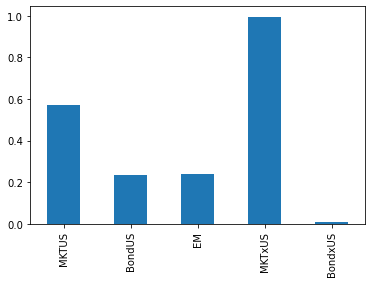

In [128]:

# ER0['same_avg_pvalue']=\
# (1-pnorm.cdf(((Re.mean()-Re.mean().mean())/(Re.std()/(Re.shape[0]**0.5))).values))*(Re.mean()>Re.mean().mean())\
# +(pnorm.cdf(((Re.mean()-Re.mean().mean())/(Re.std()/(Re.shape[0]**0.5))).values))*(Re.mean()<=Re.mean().mean())
#(probability of being above the average)*(average above avg across assets?)
#(probability of being below the average)*(average below avg across assets?)

# or much more easily:
# (1) save the standard deviation of the average excess return of each asset as `stdmean`
stdmean=Re.std()/(Re.shape[0]**0.5)
# (2) construct the t-stat for each asset
tstatmean=np.abs((Re.mean()-Re.mean().mean())/stdmean).values
# (3) calculate p-values for two-sided hypothesis testing
ER0['same_avg_pvalue']=(1-ps.cdf(tstatmean))*2

print(ER0)

# pvalue is the probability that the null hupothesis is right. So in this case it tells us that there is 
# a 60% probability that the mktus return equals to the average  and 100% probability that the MKTxUS expected return
# is equal to the average of all assets average returns

# here we can only clearly reject the hypothesis that non us bonds expected returns are equal to the average returns
ER0.same_avg_pvalue.plot.bar()
plt.show()

> Can you interepret this plot?

In [182]:
# lets look at what happens with weights and Sharpes as we pertubate the mean of the market return by one standard deviation
Wmve=pd.DataFrame([],index=Re.columns)

Ere=Re.mean()
T=Re.shape[0]
# lets perturb the market mean using the 1 sided 95% confidence

ERemsig=Ere.copy()
asset='MKTUS'
pertubation=1.64
mu=Re[asset].mean()
musigma=Re[asset].std()/T**0.5
ERemsig[asset]=mu-pertubation*musigma

# mve for perturbed mean
Wmve[asset+'-'+str(pertubation)+'std'] =np.linalg.inv(Cove) @ ERemsig.values

# mve for sample mean
Wmve['samplemean'] =np.linalg.inv(Cove) @ ERe.values

# why I am using absolute values to normalize the weights?
Wmve=Wmve/Wmve.sum().abs()
Wmve


,MKTUS-1.64std,samplemean
MKTUS,-0.112862,0.254790
BondUS,0.309397,0.197599
EM,0.325360,0.222844
MKTxUS,0.048003,-0.142493
BondxUS,0.430103,0.467259


In [183]:
Re.corr()

,MKTUS,BondUS,EM,MKTxUS,BondxUS
MKTUS,1.000000,0.071609,0.491055,0.613081,0.210263
BondUS,0.071609,1.000000,-0.097846,-0.007781,0.373399
EM,0.491055,-0.097846,1.000000,0.596177,0.207206
MKTxUS,0.613081,-0.007781,0.596177,1.000000,0.447951
BondxUS,0.210263,0.373399,0.207206,0.447951,1.000000


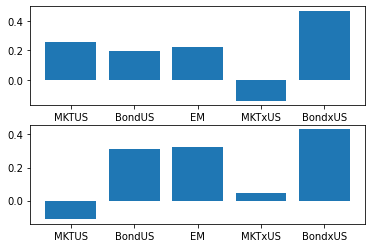

In [184]:
# lets compare with the MVE weights using the sample mean
plt.subplot(2,1,1)
plt.bar(x=ERe.index,height=Wmve['samplemean'])
plt.subplot(2,1,2)
plt.bar(x=ERe.index,height=Wmve['MKTUS-1.64std']/np.abs(Wmve['MKTUS-1.64std'].sum()))
plt.show()

# observation: In class I got all confused with this plot. Basically, I was dividing by the sum of the weights to normalize 
# the weights so we could clearly see in the plot (again, only relative weights matters becasue we are looking as excess returns)
# but obviously I cannot multiply/divide by a negative number otherwise I will be shorting instead of going long the tangency portfolio
# which would be a stupid thing to do! 
# So Wmve['MKTUS-1.96std']/(Wmve['MKTUS-1.96std'].sum())
# was doing two things, It was normalizing but also multiplying by a negative number since (Wmve['MKTUS-1.96std'].sum())<0
# So now by having the abosulte value function I am just normalizing.